In [1]:
!pip install pandas yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ------------------------------------- 949.2/949.2 kB 15.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 34.4 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15618 sha256=f37022f9922d3e1328a6dd85795e328a4570d0d6cfa35326852e8eb41768e632
  Stored in directory: c:\users\aliab\appdata\local\pip\cache\wheels\1e\df\0f\e2bbb22d689b30c681feb5410ab6

  DEPRECATION: Building 'multitasking' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'multitasking'. Discussion can be found at https://github.com/pypa/pip/issues/6334


## Step 1: Import the Data Into a Dataframe and Check Data Structures and Missing Values

In [10]:
import yfinance as yf
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [11]:
# We will use Apple stock data
ticker_symbol = 'AAPL'

# Choose date from the last 5 years
from datetime import datetime, timedelta
end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=5*365)).strftime('%Y-%m-%d') 

In [12]:
stock_data = yf.download(
    tickers=ticker_symbol,
    start=start_date,
    end=end_date,
    interval='1d'
    )

[*********************100%***********************]  1 of 1 completed


In [13]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-09-30,112.650444,114.060889,110.520197,110.685557,142675200
2020-10-01,113.603722,114.508350,112.669913,114.430530,116120400
2020-10-02,109.936554,112.222447,109.158384,109.810103,144712000
2020-10-05,113.321640,113.467549,110.452125,110.802304,106243800
2020-10-06,110.072746,112.951990,109.187570,112.543443,161498200


In [14]:
# Check data structure and types
stock_data.info

<bound method DataFrame.info of Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2020-09-30  112.650444  114.060889  110.520197  110.685557  142675200
2020-10-01  113.603722  114.508350  112.669913  114.430530  116120400
2020-10-02  109.936554  112.222447  109.158384  109.810103  144712000
2020-10-05  113.321640  113.467549  110.452125  110.802304  106243800
2020-10-06  110.072746  112.951990  109.187570  112.543443  161498200
...                ...         ...         ...         ...        ...
2025-09-22  256.079987  256.640015  248.119995  248.300003  105517400
2025-09-23  254.429993  257.339996  253.580002  255.880005   60275200
2025-09-24  252.309998  255.740005  251.039993  255.220001   42303700
2025-09-25  256.869995  257.170013  251.710007  253.210007   55202100
2025-09-26  255.460007  257.600006  253.779999  254.100006

In [15]:
# Check for missing values
stock_data.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [18]:
stock_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1254.000000,1254.000000,1254.000000,1254.000000,1.254000e+03
mean,171.811442,173.532687,169.910604,171.635719,7.346407e+07
std,36.573294,36.758468,36.276681,36.492179,3.197581e+07
min,105.802505,107.660400,104.392068,106.133233,2.323470e+07
25%,143.070354,144.608292,141.379396,142.924284,5.038465e+07
50%,168.786392,170.188484,167.260330,168.465343,6.624805e+07
75%,196.485973,199.307151,194.446267,196.628261,8.883520e+07
max,258.103729,259.179926,256.718662,257.276679,3.186799e+08


## Step 2: Exploratory Data Analysis (EDA)

<Figure size 1400x800 with 0 Axes>

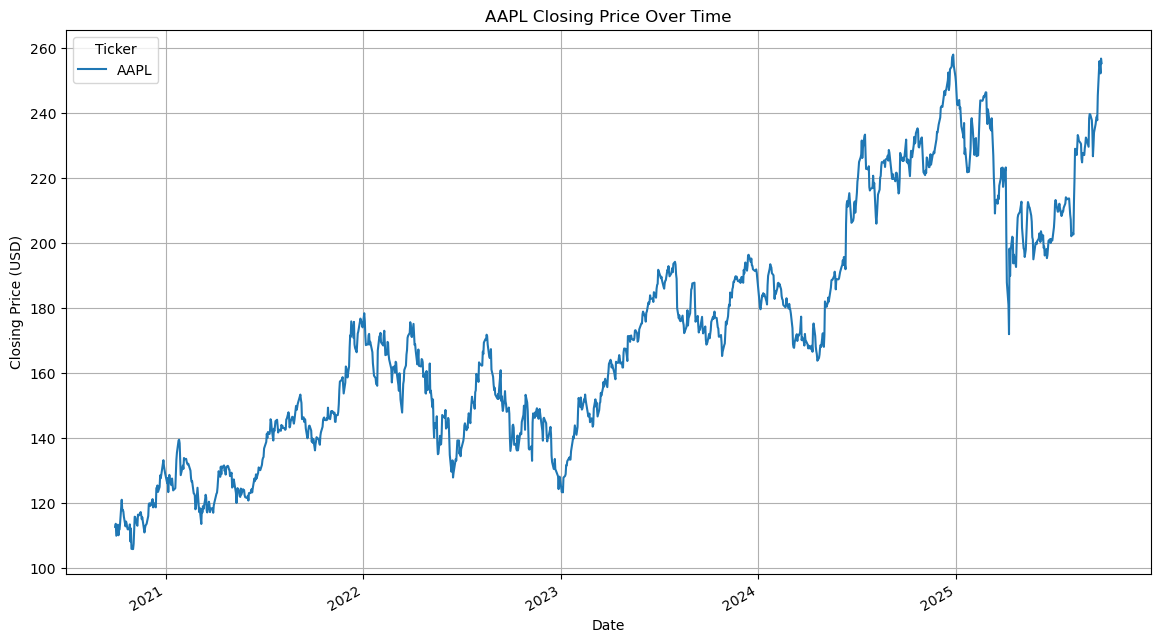

In [45]:
# Plotting price trends
import matplotlib.pyplot as plt

plt.figure(figsize = (14,8))

stock_data['Close'].plot(title=f'{ticker_symbol} Closing Price Over Time', figsize = (14, 8))

plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

We can see an increasing overall trend in the closing prices over the years

In [22]:
# Calculating Simple Moving Averages (MA)

# Calculate 50-day simple moving average
stock_data['50-day SMA'] = stock_data['Close'].rolling(window=50).mean()

# Calculate 200-day simple moving average
stock_data['200-day SMA'] = stock_data['Close'].rolling(window=200).mean()

<Figure size 1400x800 with 0 Axes>

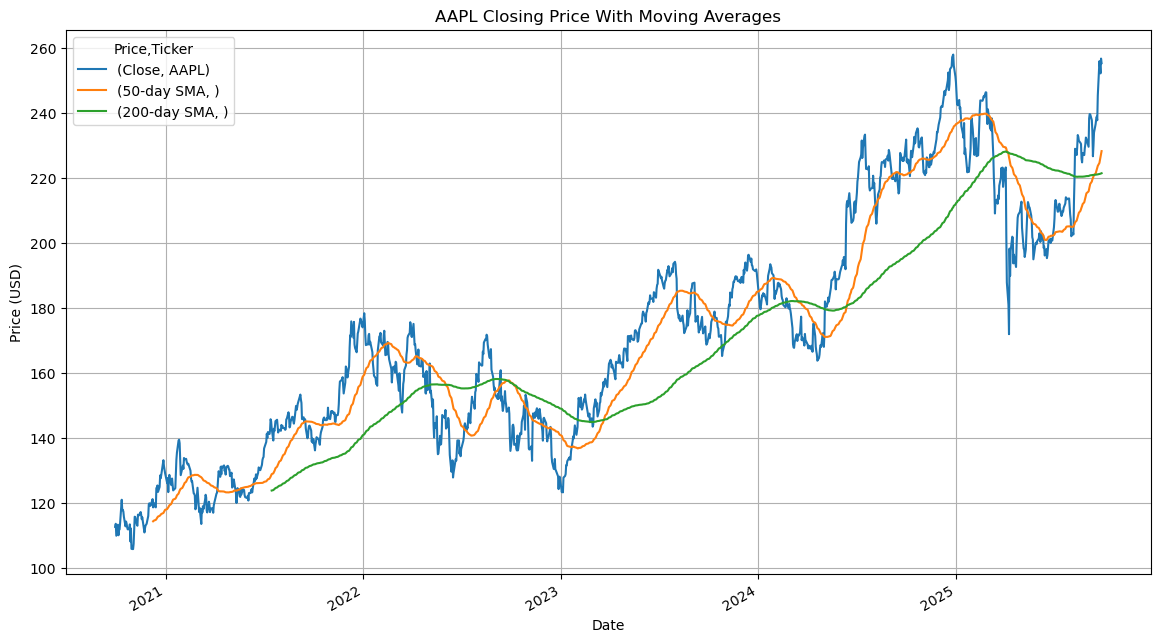

In [26]:
# Visualizing Simple Moving Averages (MA)
plt.figure(figsize = (14, 8))

stock_data[['Close', '50-day SMA', '200-day SMA']].plot(title=f'{ticker_symbol} Closing Price With Moving Averages', figsize = (14, 8))

plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

<Figure size 1400x700 with 0 Axes>

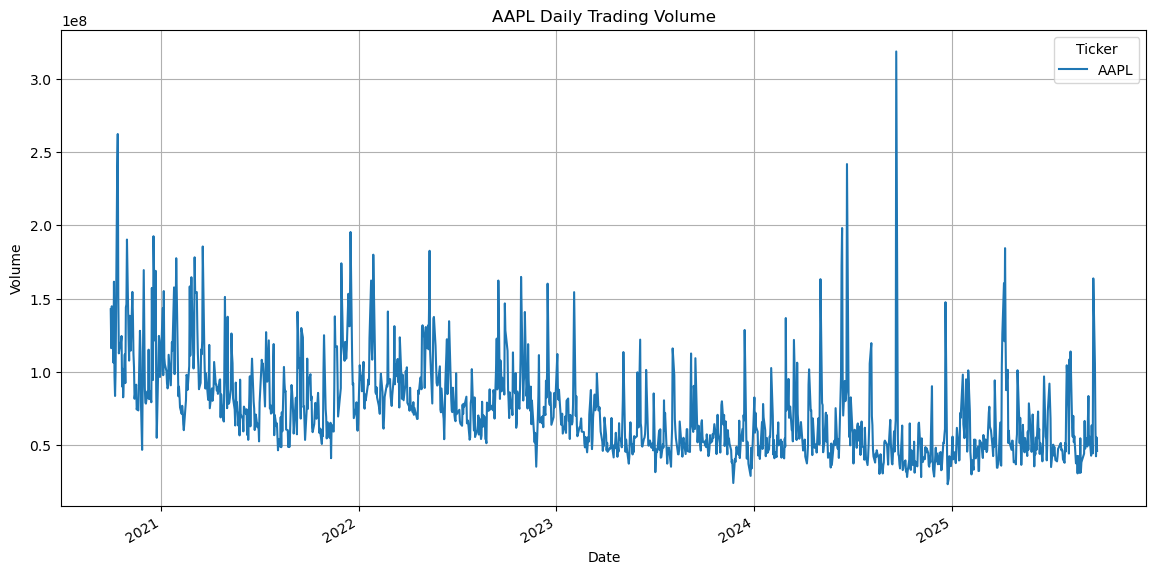

In [34]:
# Analyzing Trading Volume
plt.figure(figsize = (14, 7))

stock_data['Volume'].plot(title=f'{ticker_symbol} Daily Trading Volume', figsize = (14, 7))
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

We can see the the daily trading volume over the years is slowly declining. However, there was a big spike of trading volume at the last quarter of 2024

In [36]:
print("Total missing values after calculating MAs:")
print(stock_data.isnull().sum())

Total missing values after calculating MAs:
Price        Ticker
Close        AAPL        0
High         AAPL        0
Low          AAPL        0
Open         AAPL        0
Volume       AAPL        0
50-day SMA              49
200-day SMA            199
dtype: int64


We can see that there is 49 missing values in the 50-day SMA column and 199 missing values in the 200-day SMA column, we need to handle this using feature engineering.

## Step 3: Feature Engineering

In [37]:
import numpy as np

# Calculate the daily log returns
stock_data['Log_Return'] = np.log(stock_data['Close']/stock_data['Close'].shift(1))

# Calculate simple daily returns
stock_data['Simple_Return'] = stock_data['Close'].pct_change()

In [39]:
# Calculate Volatility
stock_data['Volatility_21d'] = stock_data['Log_Return'].rolling(window=21).std() * np.sqrt(252)
# We choose the window 21 since there are 21 trading days in a month
# Multiply by sqrt(252) to annualize the volatility (252 trading days in a year)

In [52]:
# Calculate a Price-to-SMA Deviation Feature
# Use the full tuple index to access the columns
Close_Price = stock_data[('Close', 'AAPL')].values
SMA_200 = stock_data[('200-day SMA', '')].values

# Perform the calculation
sma_deviation_values = (Close_Price - SMA_200) / SMA_200

# Create the new column as a single-level index Series
stock_data['SMA_Deviation'] = pd.Series(sma_deviation_values, index=stock_data.index)

Now we need to define the target variable we will use to predict the future stock price.
We will predict whether the stock price will go up (1) or down (0) tomorrow turning it into a classification problem:

In [54]:
# Calculate the price change 1 day into the future (the target value for today)

close_col_name = ('Close', 'AAPL')

# .shift(-1) moves the future return UP to the current row.
tomorrow_close_series = stock_data[close_col_name].shift(-1)
stock_data['Tomorrow_Close'] = tomorrow_close_series

# Define the target: 1 if tomorrow's price is higher than today's, 0 otherwise
stock_data['Target'] = (stock_data['Tomorrow_Close'] > stock_data[close_col_name]).astype(int)
# This will return 1 (UP) if the boolean is True and 0 (DOWN) if False since we casted it as an integer

In [57]:
# Drop missing values
stock_data.dropna(inplace=True)

# Check for missing values
print(stock_data.isnull().sum())
print('Total rows remaining after dropping missing values: ', len(stock_data))

Price           Ticker
Close           AAPL      0
High            AAPL      0
Low             AAPL      0
Open            AAPL      0
Volume          AAPL      0
50-day SMA                0
200-day SMA               0
Log_Return                0
Simple_Return             0
Volatility_21d            0
SMA_Deviation             0
Tomorrow_Close            0
Target                    0
dtype: int64
Total rows remaining after dropping missing values:  1054


In [58]:
# Lets see our clean and engineered datasat
stock_data.head()

Price,Close,High,Low,Open,Volume,50-day SMA,200-day SMA,Log_Return,Simple_Return,Volatility_21d,SMA_Deviation,Tomorrow_Close,Target
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,,,
Date,,,,,,,,,,,,,
2021-07-16,143.097610,146.391813,142.599086,145.121062,93251400,128.882489,123.846250,-0.014176,-0.014076,0.170667,0.155446,139.246262,0
2021-07-19,139.246262,140.829838,138.483805,140.517027,121434600,129.135273,123.979229,-0.027283,-0.026914,0.202969,0.123142,142.862991,1
2021-07-20,142.862991,143.791637,139.744749,140.233504,96350000,129.446902,124.125525,0.025642,0.025974,0.209944,0.150956,142.129868,0
2021-07-21,142.129868,142.843460,141.377196,142.256949,74993500,129.809557,124.286492,-0.005145,-0.005132,0.210543,0.143566,143.498398,1
2021-07-22,143.498398,144.866905,142.530658,142.657739,77338200,130.217960,124.437376,0.009583,0.009629,0.209327,0.153178,145.218826,1


## Step 4: Model Building (Classification)

In [68]:
# Create variables for the features X and the target feature Y
features = ['50-day SMA', '200-day SMA', 'Log_Return', 'Volatility_21d', 'SMA_Deviation']

X = stock_data[features]
Y = stock_data['Target']

In [99]:
from sklearn.model_selection import train_test_split

# Split the dataset and use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [100]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [101]:
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

# Calculate Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Print the Mean Squared Error
print("\nMean Squared Error: ")
print(mean_squared_error(y_test, y_pred))


# Print the classification report
print("\nClassification Report (Key Metric: Precision for '1' [UP]):")
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
print("\nConfusion Matrix: ")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.5355

Mean Squared Error: 
0.46445497630331756

Classification Report (Key Metric: Precision for '1' [UP]):
              precision    recall  f1-score   support

           0       0.48      0.49      0.49        95
           1       0.58      0.57      0.57       116

    accuracy                           0.54       211
   macro avg       0.53      0.53      0.53       211
weighted avg       0.54      0.54      0.54       211


Confusion Matrix: 
[[47 48]
 [50 66]]


This means that our model is accurate in predicting the stock price 55% of the time

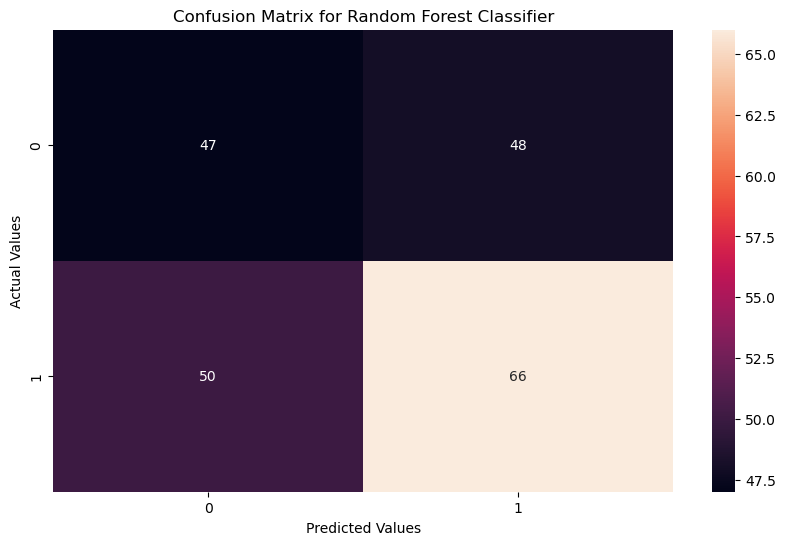

In [104]:
import seaborn as sns

# Plot the Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10, 6))
sns.heatmap(conf_mat, annot=True, fmt='d')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix for Random Forest Classifier')

plt.show()

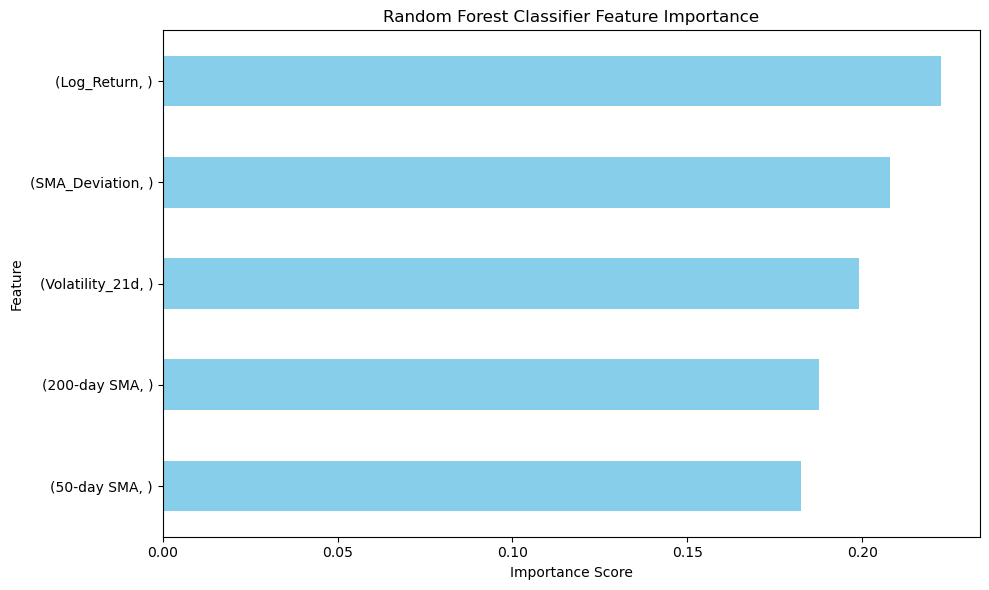

In [103]:
# Lets plot the feature importance. Feature Importance shows which indicators the model relied on most heavily.

# Get feature importances from the trained model
importances = model.feature_importances_
feature_names = X_train.columns

# Create a Series
feature_importance_df = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize = (10, 6))
feature_importance_df.plot(
    kind='barh',
    color='skyblue',
    title='Random Forest Classifier Feature Importance'
)

plt.gca().invert_yaxis()

plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

We can see that the most important feature in predicting the stock price is the Daily Log Return

### Conclusion:

- **Goal:** The goal of this project was to build a model that can predict the future stock price for Apple using technical indication.
- **Accuracy:** The overall accuracy achieved was approximately 54% which is as expected since simple technical analysis struggles against Efficient Market Hypothesis. However, when the model predicted the stock price would rise, it was correct 54% of the time, this slight edge is where potential profit lies.
- **Limitations:** It is clear that the model is not suitable for live trading due to its reliance on non-stationary data and its inability to capture time-series dependencies (a weakness of the Random Forest model)
- **Feature Importance:** The key drivers in predicting the stock price were daily log return which makes sense that the most recent change is a key driver, simple moving average the model likely used this to identify current trends (if the price is above the SMA, the trend is up), and volatility high volatility often indicates uncertainty, which might make the prediction less reliable.
- **Suitability:** The Random Forest model is designed for independent, cross-sectional data. It completely ignores the sequential nature of time series data. The decision of whether Apple's stock goes up tomorrow heavily depends on today's price, yesterday's volume, and the change over the last hour. Random Forest treats each day's data point as completely independent, which is a fundamentally flawed assumption for finance.
- **Model Improvement:** Shifting to Time Series-specific models to handle the sequential nature of the data would be better. Also, incorporating external data that moves markets, such as Macroeconomic Indicators and Sentiment Data would improve the accuracy of the model